#### Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# df = pd.read_csv('bank_data.csv',sep=";")
df = pd.read_csv('bank_data.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

In [8]:
df.shape

(41188, 21)

### Data Preprocessing

#### 1) Handle Null Values

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### 2) Handle Duplicates

In [10]:
df.duplicated().sum()

12

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.shape

(41176, 21)

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df['duration'].head(10)

0    261
1    149
2    226
3    151
4    307
5    198
6    139
7    217
8    380
9     50
Name: duration, dtype: int64

In [15]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [16]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [17]:
df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [18]:
df['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [19]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [20]:
df['education'] = df['education'].replace(['basic.9y','basic.6y','basic.4y'],'basic')
df['education'].value_counts()

basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [21]:
df['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [22]:
for i in ['housing','loan','contact']:
  print(f'Feature :{i}')
  print(df[i].value_counts())

Feature :housing
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
Feature :loan
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64
Feature :contact
cellular     26135
telephone    15041
Name: contact, dtype: int64


### EDA

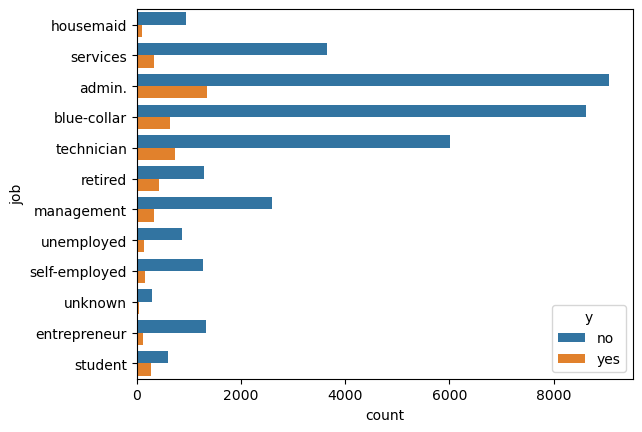

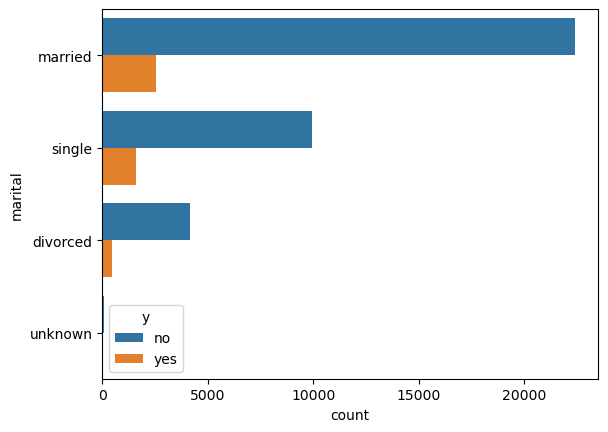

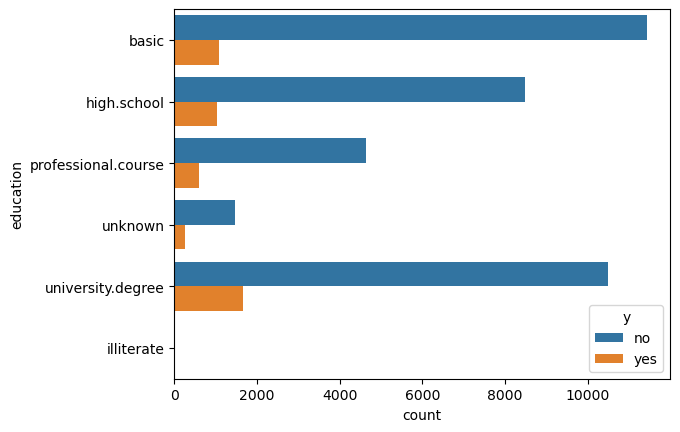

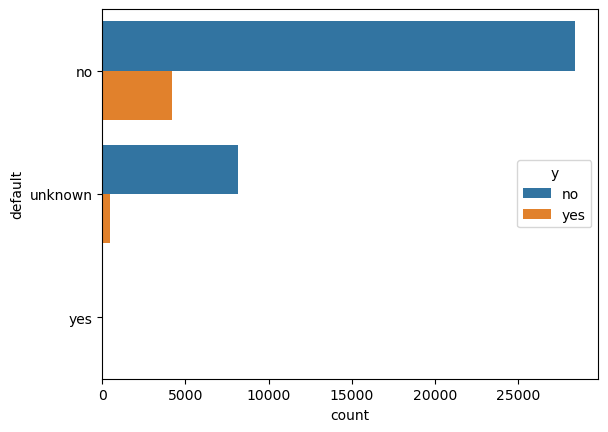

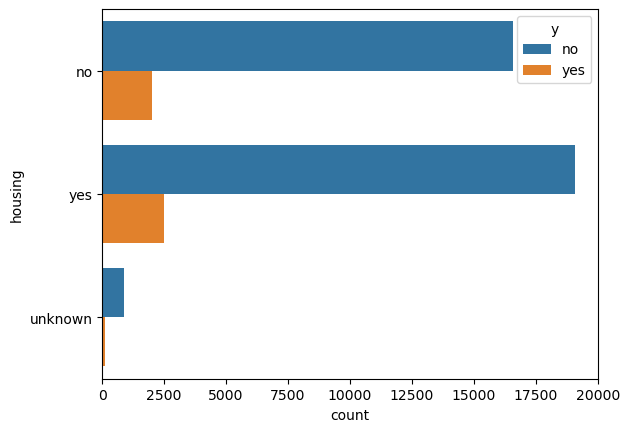

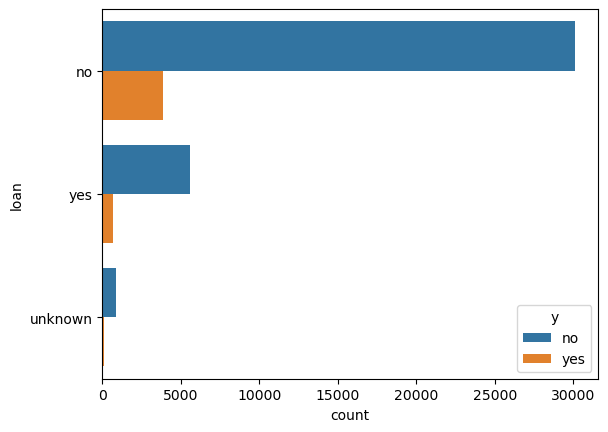

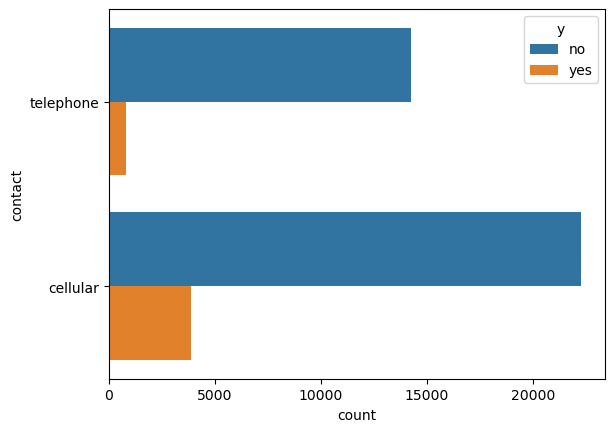

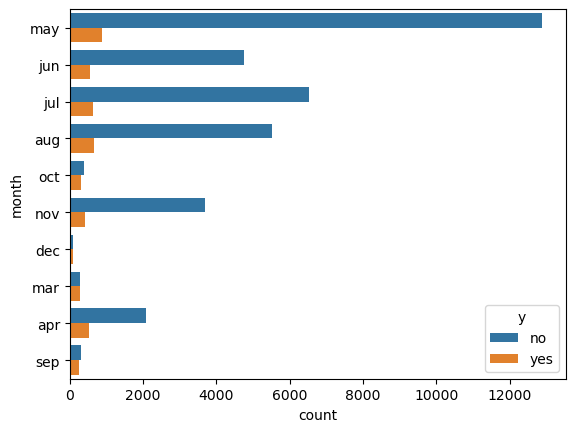

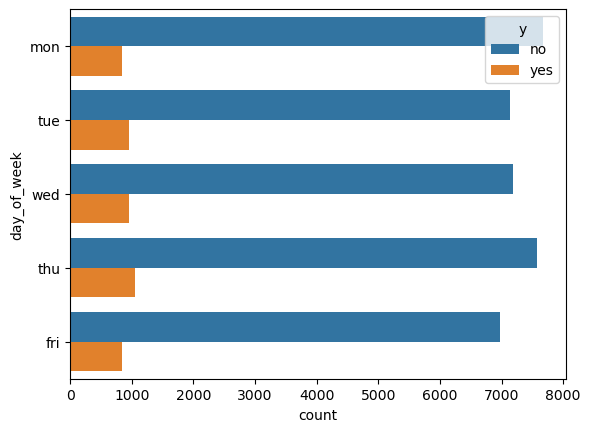

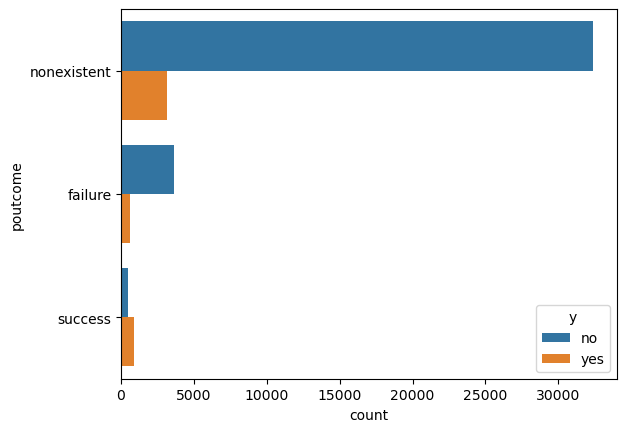

In [23]:
for i in cat_cols[:-1]:
  sns.countplot(y=df[i],hue=df['y'])
  plt.show()

In [24]:
#### Correlation

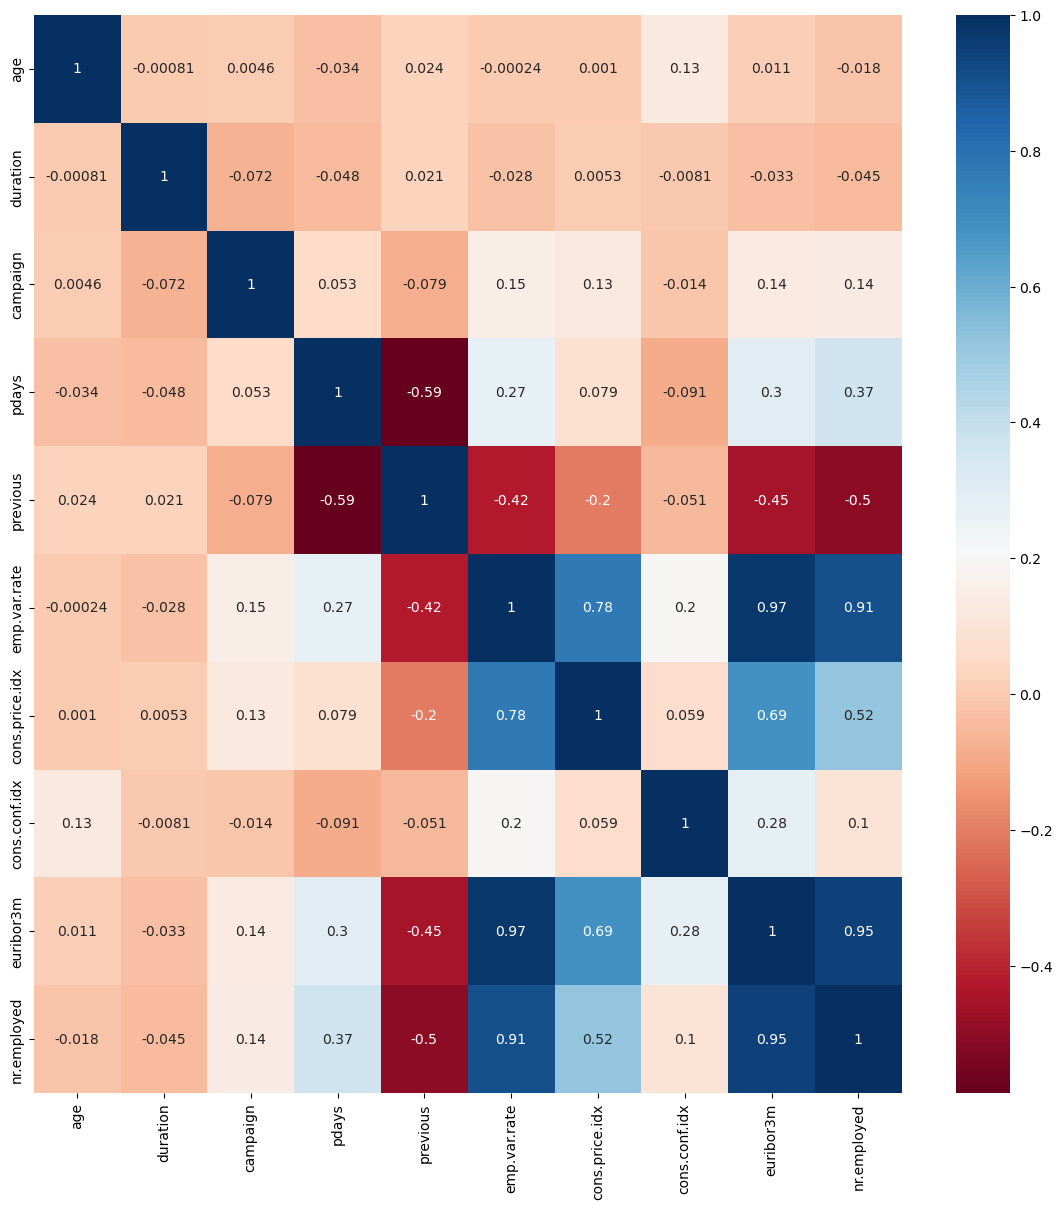

In [25]:
corr = df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Outlier Treatment

In [26]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,96%,97%,98%,99%,max
age,41176.0,40.023800,10.420680,17.000,23.000,24.000,25.000,26.000,38.000,59.000,59.000,62.000,71.000,98.000
duration,41176.0,258.315815,259.305321,0.000,11.000,17.000,23.000,36.000,180.000,821.000,911.000,1052.500,1271.250,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,1.000,1.000,1.000,2.000,8.000,9.000,11.000,14.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,6.000,9.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,2.000,2.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-3.400,-3.400,-3.000,-2.900,1.100,1.400,1.400,1.400,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,92.201,92.379,92.431,92.713,93.749,94.465,94.465,94.465,94.465,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-49.500,-47.100,-47.100,-47.100,-41.800,-31.400,-31.400,-30.100,-26.900,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,0.714,0.720,0.797,4.857,4.967,4.967,4.968,4.968,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,4963.600,4991.600,4991.600,5017.500,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100


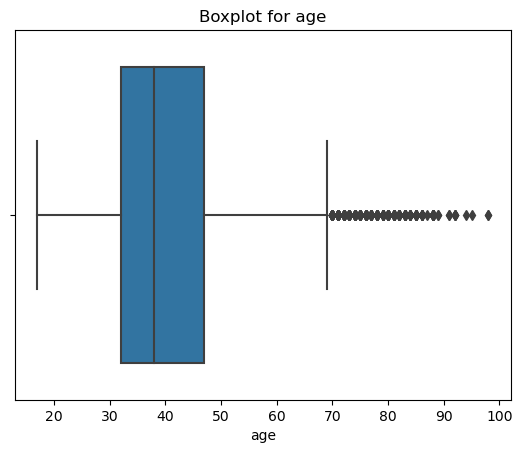

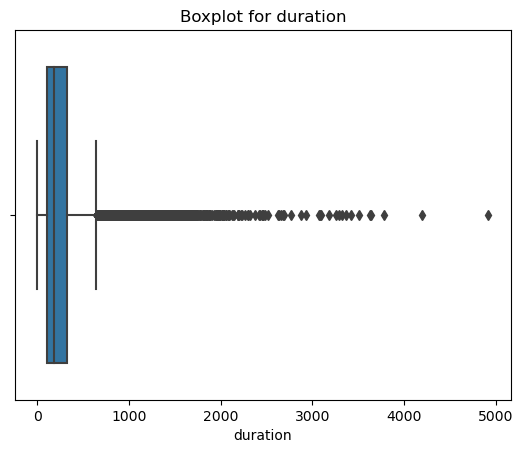

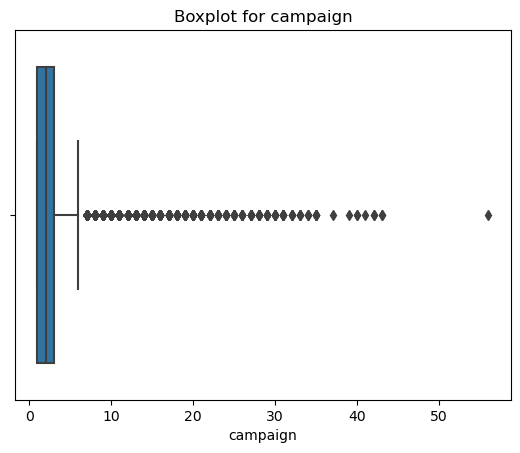

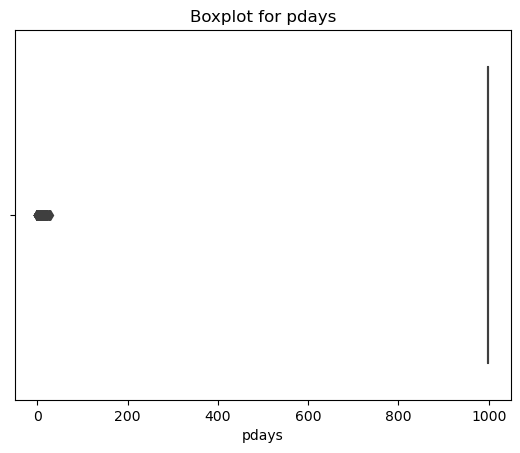

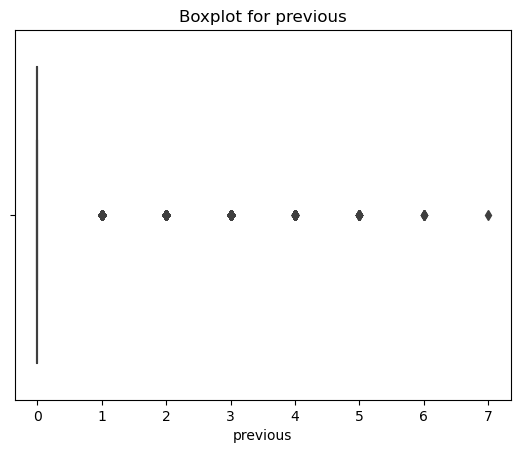

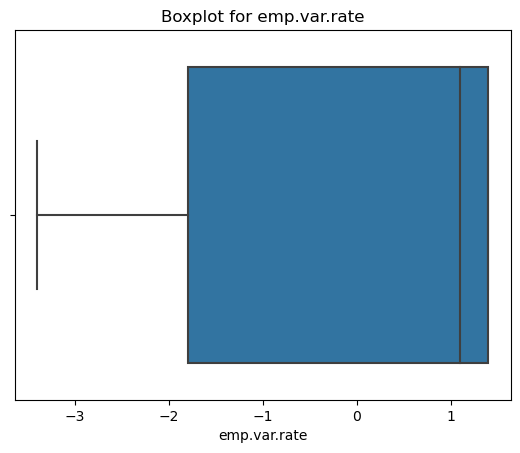

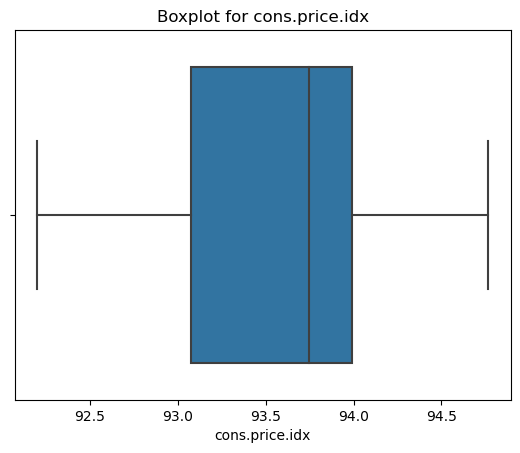

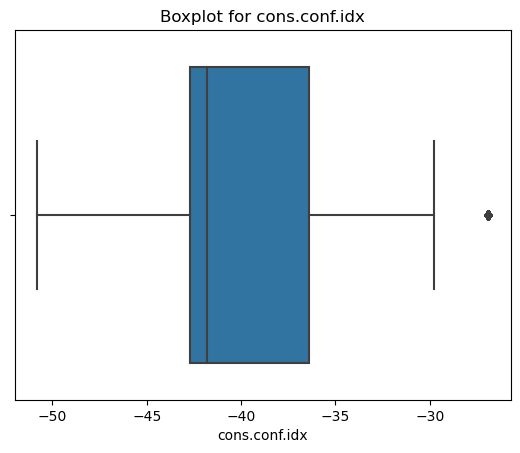

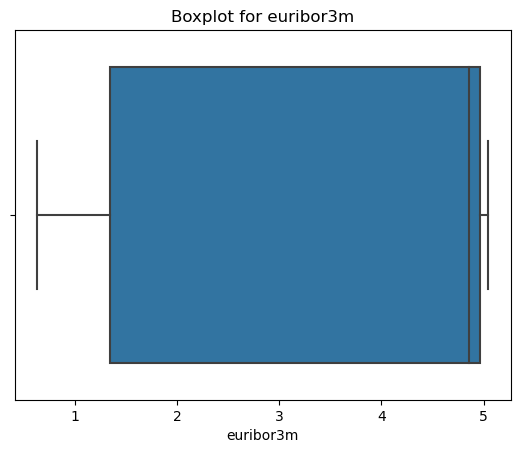

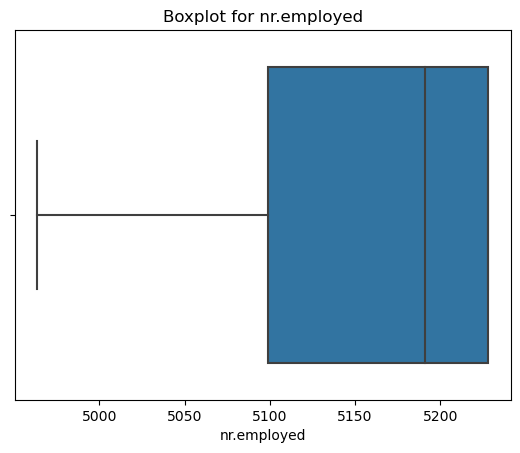

In [27]:
for i in num_cols:
  plt.title(f'Boxplot for {i}')
  sns.boxplot(x=df[i])
  plt.show()

In [28]:
df1 = df.copy()

In [29]:
def outlier_treatment(x):
  x = x.clip(upper=x.quantile(0.99))
  x = x.clip(lower=x.quantile(0.01))
  return x

In [30]:
# df[out_cols] = df[out_cols].apply(outlier_treatment)

out_cols = ['age','duration','campaign','previous']
df[out_cols] = df[out_cols].apply(lambda x :  outlier_treatment(x))

In [31]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,96%,97%,98%,99%,max
age,41176.0,39.976370,10.137591,23.000,23.000,24.000,25.000,26.000,38.000,59.000,59.000,62.000,71.0000,71.000
duration,41176.0,254.410652,235.211228,11.000,11.000,17.000,23.000,36.000,180.000,821.000,911.000,1052.500,1271.0625,1271.250
campaign,41176.0,2.500291,2.301416,1.000,1.000,1.000,1.000,1.000,2.000,8.000,9.000,11.000,14.0000,14.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,6.000,9.000,999.000,999.000,999.000,999.000,999.000,999.0000,999.000
previous,41176.0,0.162449,0.433295,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,2.000,2.0000,2.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-3.400,-3.400,-3.000,-2.900,1.100,1.400,1.400,1.400,1.4000,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,92.201,92.379,92.431,92.713,93.749,94.465,94.465,94.465,94.4650,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-49.500,-47.100,-47.100,-47.100,-41.800,-31.400,-31.400,-30.100,-26.9000,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,0.714,0.720,0.797,4.857,4.967,4.967,4.968,4.9680,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,4963.600,4991.600,4991.600,5017.500,5191.000,5228.100,5228.100,5228.100,5228.1000,5228.100


In [32]:
# df_dum = pd.get_dummies(df,columns=cat_cols[:-1],drop_first=True)
# print(len(df_dum.columns))
# print(df_dum.columns)

In [33]:
# df1 = df.copy()

In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in cat_cols[:-1]:
  df[i] = lb.fit_transform(df[i])

In [35]:
df.dtypes

age               float64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [36]:
x = df.drop('y',axis=1)
y = df['y']
print(x.shape)
print(y.shape)

(41176, 20)
(41176,)


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28823, 20)
(12353, 20)
(28823,)
(12353,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
fimp = pd.DataFrame({'Feature' : x.columns,'Imp' : rf.feature_importances_})
fimp = fimp.sort_values('Imp',ascending=False)
fimp

,Feature,Imp
10,duration,0.318858
18,euribor3m,0.110406
0,age,0.089406
19,nr.employed,0.057115
1,job,0.049060
11,campaign,0.042498
9,day_of_week,0.042463
3,education,0.038035
12,pdays,0.036509
14,poutcome,0.031279


In [40]:
sig_feat = fimp['Feature'][fimp['Imp']>=0.02].values
print(sig_feat)

['duration' 'euribor3m' 'age' 'nr.employed' 'job' 'campaign' 'day_of_week'
 'education' 'pdays' 'poutcome' 'cons.conf.idx' 'marital' 'emp.var.rate'
 'cons.price.idx' 'housing']


#### SVM Model Building

In [41]:
x1 = df[sig_feat]
y1 = df['y']
print(x1.shape)
print(y1.shape)

(41176, 15)
(41176,)


In [42]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.30,random_state=42)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(28823, 15)
(12353, 15)
(28823,)
(12353,)


In [43]:
from sklearn.svm import SVC

In [44]:
m1= SVC(kernel='linear')
m1.fit(x_train1,y_train1)

SVC(kernel='linear')

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Prediction\n',y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))


In [47]:
m1= SVC(kernel='linear')
gen_metrics(m1,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'no' 'no' 'no']
Training score 0.9060125594143565
Testing score 0.9028576054399741
Accuracy_Score 0.9028576054399741
Confusion Matrix
 [[10663   266]
 [  934   490]]
Classification Report
               precision    recall  f1-score   support

          no       0.92      0.98      0.95     10929
         yes       0.65      0.34      0.45      1424

    accuracy                           0.90     12353
   macro avg       0.78      0.66      0.70     12353
weighted avg       0.89      0.90      0.89     12353



In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
hparams_svm = {'kernel':['linear','poly','rbf'],
               'C':[0.001,0.01,0.1,1,10],
               'degree':[2,3,4],
               'gamma':[0.001,0.01,0.1,1,10]}

In [ ]:
base_model = SVC()

gs = GridSearchCV(base_model,param_grid=hparams_svm,scoring='accuracy',cv=5)
gs.fit(x_train1,y_train1)